In [1]:
import imageio as img
import matplotlib.pyplot as plt
import numpy as np
import copy
from scipy import signal
from scipy import ndimage
import matplotlib


(1195, 1857, 4)
(1195, 1857)


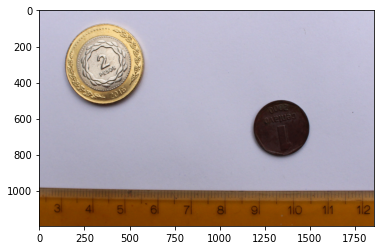

In [2]:
#matplotlib.use('Qt5Agg')

im = img.imread('vil_metal.png')

#Mostrar imagen original
print(im.shape)
print(im[:,:,0].shape)
plt.imshow(im)
plt.show()

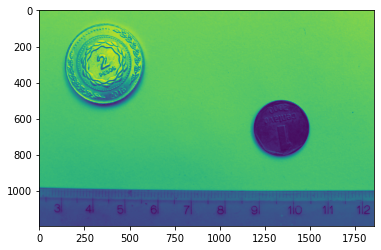

In [3]:
#Definir la matriz que hará la convolución
kernel = [[1,2,1],[0,0,0],[-1,-2,-1]]

#componente verde de la imagen convolucionada (detección de bordes horizontal)
H = signal.convolve2d(im[:,:,1], kernel)


#Mostrar componente verde de la imagen
plt.imshow(im[:,:,1])
plt.show()

(1197, 1859)


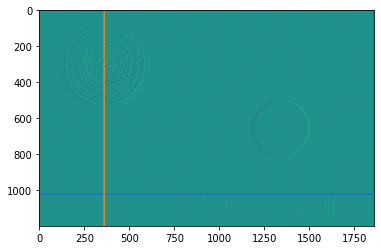

In [4]:
#componente verde de la imagen convolucionada (detección de bordes vertical)
V = signal.convolve2d(im[:,:,1], np.transpose(kernel))

print(V.shape)

#Mostrar imagen con detección de bordes vertical y dos rectas, una horizontal y otra vertical
#La intersección de las rectas muestra alrededor de qué puntos de la regla voy a calibrar
plt.imshow(V)
posicion_de_calibracion_y = 1022
posicion_de_calibracion_x = 360
plt.plot(np.arange(0,1859), np.ones(1859)*posicion_de_calibracion_y)
plt.plot(np.ones(1197)*posicion_de_calibracion_x, np.arange(0,1197))
plt.xlim([0,1859])
plt.ylim([1197,0])
plt.show()

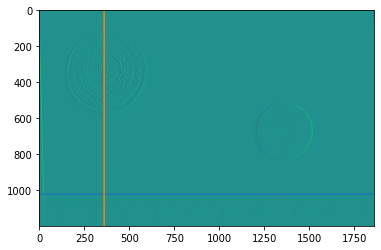

In [5]:
#Se ve que las lineas de la regla no estan perfectamente alineadas con la recta vertical
#Rotar la imagen en el ángulo necesario:
angulo = 1.5
V_rotada = ndimage.rotate(V, angulo)
plt.imshow(V_rotada)
plt.plot(np.arange(0,1859),np.ones(1859)*posicion_de_calibracion_y)
plt.plot(np.ones(1197)*posicion_de_calibracion_x, np.arange(0,1197))
plt.xlim([0,1859])
plt.ylim([1197,0])
plt.show()

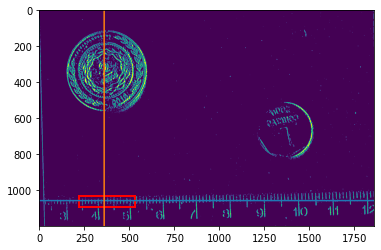

In [6]:
#Creamos imagen binarizada y modifico la posición de la recta horizontal:
modificacion = 35
posicion_de_calibracion_y = posicion_de_calibracion_y + modificacion
im_bin = np.zeros(V_rotada.shape)
filtro = (V_rotada > 25)
im_bin[filtro] = 1

#Mostramos imagen binarizada más el rango del plot que vamos a utilizar para calibrar
fig, ax = plt.subplots(1)
ax.imshow(im_bin)
ax.plot(np.arange(0,1859),np.ones(1859)*posicion_de_calibracion_y)
ax.plot(np.ones(1197)*posicion_de_calibracion_x, np.arange(0,1197))
plt.xlim([0,1859])
plt.ylim([1197,0])
ax.add_patch(matplotlib.patches.Rectangle((220,1030),310,60, linewidth=2,fc="none",color="red"))
plt.show()

Len puntos:  18
17.684970513941632 ± 3.2556787409603882


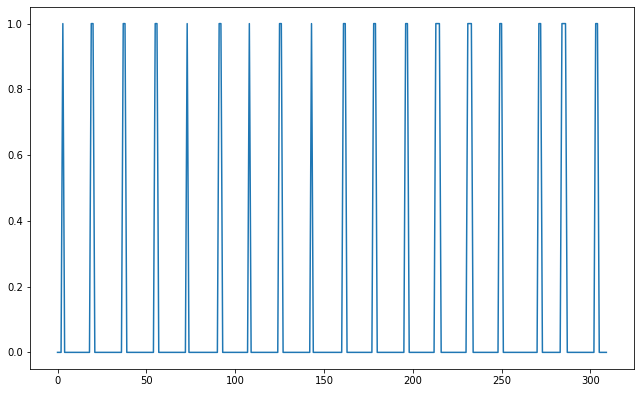

In [8]:
matplotlib.use('Qt5Agg')

#Hacemos un ploteo de los valores de la imagen para la recta horizontal entre los valores de x
#tales que la rotación siga valiendo. Además extraemos los puntos necesarios del plot.
#Todos los puntos se seleccionan a mano y precisamente (método 1):
vals_a_yfijo = im_bin[posicion_de_calibracion_y, 220:530]
plt.plot(vals_a_yfijo)
puntos = plt.ginput(18, timeout=60)
print("Len puntos: ",len(puntos))
puntos = np.array(puntos)
puntos_x = puntos[:,0]
plt.show()

#Calculamos el promedio de distancia entre los puntos y la desviación estandar
#correspondiente, con eso definimos una escala pixel/mm para así medir las distancias.
diff = np.diff(puntos_x)
escala = np.mean(diff)
escala_error = np.std(diff)
print(escala, "±", 2*escala_error)


Len puntos2:  18
17.71729041402803


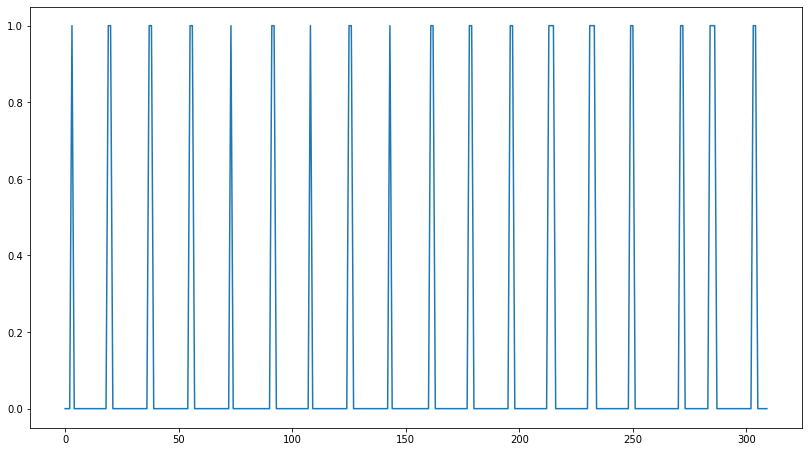

In [9]:
#Voy a hacer lo mismo perocon otro método. Se cuentan todos los puntos a manos pero sólo es 
#necesario tomar precisamente el primero y el último:
vals_a_yfijo = im_bin[posicion_de_calibracion_y, 220:530]
plt.plot(vals_a_yfijo)
puntos2 = plt.ginput(18, timeout=60)
print("Len puntos2: ",len(puntos2))
puntos2 = np.array(puntos2)
puntos2_x = puntos2[:,0]
plt.show()

#Calculamos el promedio de distancia entre el punto inicial y el final, luego dividimos por
#la cantidad de puntos para obtener una distancia promedio.
#¿Cómo calculo el error de esto?
diff2 = puntos2_x[-1] - puntos2_x[0]
escala2 = diff2/(len(puntos2_x)-1)
#escala_error = np.std(diff)??
print(escala2) #, "±", escala_error)

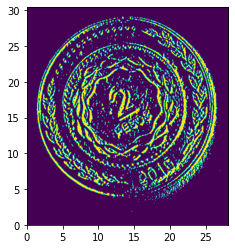

In [20]:
#ahora normalizamos el gráfico. pero lo voy a hacer para la región cercana a donde calibré:
eje_x = np.arange(im_bin[90:630,130:630].shape[1])/escala2
eje_y = np.arange(im_bin[90:630,130:630].shape[0])/escala2

plt.imshow(im_bin[90:630,130:630], extent=[eje_x.min(), eje_x.max(), eje_y.min(), eje_y.max()])
plt.show()